<a href="https://colab.research.google.com/github/georgeaidinis/NTUA/blob/master/NN/Lab%201/Lab_1_Small_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


#Lab 1: Επιβλεπόμενη Μάθηση - Ταξινόμηση - Μικρό Dataset (S11 - Quality Assessment of Digital Colposcopies)


---

#Section A

---


Αϊδίνης Γιώργος 03116031

Κολιός Παναγιώτης 03116100

---

Ομάδα M.B.8



# Section B

---


Αρχικά ενημερώνουμε τις βιβλιοθήκες που θα χρησιμοποιήσουμε.



In [1]:
# -*- coding: utf-8 -*-
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package
import warnings 
warnings.filterwarnings('ignore')

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
     |████████████████████████████████| 7.0MB 8.4MB/s 
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.17.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.3)


Κατεβάζουμε το αρχείο που περιέχει το dataset:

In [0]:
from urllib.request import urlretrieve
import os
import zipfile

def download(url, file):
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")


In [3]:
download("http://archive.ics.uci.edu/ml/machine-learning-databases/00384/Quality%20Assessment%20-%20Digital%20Colposcopy.zip","QADC.zip")
print("All the files are downloaded")

Download file... QADC.zip ...
File downloaded
All the files are downloaded


Βλέπουμε ότι το αρχείο όντως κατέβηκε:

In [4]:
!ls

QADC.zip  sample_data


Επειδή είναι compressed, πρεπει να το κάνουμε decompress και να δουμε ότι όντως έγινε:

In [0]:
!unzip -q "QADC.zip"

In [6]:
!ls

 QADC.zip  'Quality Assessment - Digital Colposcopy'   sample_data


Μετονομάζουμε τον φάκελο για να έχει μικρότερο όνομα:



In [0]:
!mv Quality\ Assessment\ -\ Digital\ Colposcopy QADC

Ανοίγοντας τον φάκελο, είδαμε ότι έχουμε τρια αρχεία, τα οποία έχουν headers, και πρέπει 1) να ενοποιηθούν σε ένα αρχείο και 2) να αφαιρεθούν οι επιπρόσθετοι headers. 

In [0]:
with open("QADC/hinselmann.csv",'r') as f:
    with open("QADC/hinselmann1.csv",'w') as f1:
        next(f) # skip header line
        for line in f:
            f1.write(line)

In [0]:
with open("QADC/schiller.csv",'r') as f:
    with open("QADC/schiller1.csv",'w') as f1:
        next(f) # skip header line
        for line in f:
            f1.write(line)

Φτιάχνουμε ένα μεγάλο αρχείο:

In [0]:
!cat QADC/green.csv QADC/hinselmann1.csv QADC/schiller1.csv > all.csv

Για να δούμε λοιπόν το dataset μας ολόκληρο:

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv("all.csv")
df

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,os_specularities_area,walls_specularities_area,speculum_specularities_area,specularities_area,area_h_max_diff,rgb_cervix_r_mean,rgb_cervix_r_std,rgb_cervix_r_mean_minus_std,rgb_cervix_r_mean_plus_std,rgb_cervix_g_mean,rgb_cervix_g_std,rgb_cervix_g_mean_minus_std,rgb_cervix_g_mean_plus_std,rgb_cervix_b_mean,rgb_cervix_b_std,rgb_cervix_b_mean_minus_std,rgb_cervix_b_mean_plus_std,rgb_total_r_mean,rgb_total_r_std,rgb_total_r_mean_minus_std,rgb_total_r_mean_plus_std,rgb_total_g_mean,rgb_total_g_std,rgb_total_g_mean_minus_std,rgb_total_g_mean_plus_std,rgb_total_b_mean,rgb_total_b_std,rgb_total_b_mean_minus_std,rgb_total_b_mean_plus_std,hsv_cervix_h_mean,hsv_cervix_h_std,hsv_cervix_s_mean,hsv_cervix_s_std,hsv_cervix_v_mean,hsv_cervix_v_std,hsv_total_h_mean,hsv_total_h_std,hsv_total_s_mean,hsv_total_s_std,hsv_total_v_mean,hsv_total_v_std,fit_cervix_hull_rate,fit_cervix_hull_total,fit_cervix_bbox_rate,fit_cervix_bbox_total,fit_circle_rate,fit_circle_total,fit_ellipse_rate,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
0,0.344647,0.003080,0.047522,0.288216,0.178585,0.016564,0.000000,0.043500,0.010149,0.000133,0.000000,0.000000,0.085833,0.024907,0.263560,37.594458,15.785021,21.809437,53.379479,109.918445,38.735421,71.183024,148.653865,55.029618,22.160330,32.869287,77.189948,38.561367,38.119059,0.442308,76.680426,95.109755,51.565052,43.544702,146.674807,48.808474,40.765228,8.043247,89.573702,5.014628,2.991944,167.952780,25.813163,109.919447,38.733741,5.090801,2.936650,159.486916,38.437294,95.123889,51.583029,0.923067,0.373371,0.844454,0.408130,0.603399,0.571175,0.962995,0.357890,85.474311,0.265933,0.346294,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.165329,0.000000,0.048236,0.504736,0.502783,0.007012,0.000000,0.097405,0.973837,0.004055,0.000000,0.000000,0.054999,0.028431,0.000000,59.505882,24.361877,35.144005,83.867760,122.366075,44.742407,77.623669,167.108482,78.058434,30.818729,47.239706,108.877163,54.932467,39.447415,15.485052,94.379883,101.680459,46.028852,55.651607,147.709311,63.218931,43.925912,19.293019,107.144843,4.944382,2.965108,130.260492,24.143867,122.366647,44.743932,5.080063,2.894163,128.251978,33.000693,101.725519,46.093510,0.850861,0.194308,0.646645,0.255673,0.497315,0.332444,0.894625,0.184803,124.794129,1.000000,0.283059,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457010,0.001681,0.242888,0.212859,0.000000,0.000000,0.000000,0.000000,0.000000,0.001756,0.000000,0.000000,0.083055,0.018591,0.269798,39.353851,19.417332,19.936519,58.771183,109.543386,49.753490,59.789896,159.296876,54.642888,27.781965,26.860923,82.424853,41.242230,34.196356,7.045875,75.438586,109.592342,57.576640,52.015702,167.168982,53.470241,38.344391,15.125850,91.814632,5.049946,2.983966,163.576979,24.973042,109.544201,49.753659,5.078936,2.968023,162.268659,33.590792,109.597127,57.584515,0.918514,0.497554,0.747443,0.611432,0.633925,0.720923,0.920287,0.496596,94.948697,0.518740,0.419375,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.513244,0.005711,0.213781,0.251819,0.079795,0.000000,0.000000,0.017594,0.007208,0.001288,0.000000,0.000315,0.000000,0.000729,0.107022,46.322391,17.711957,28.610434,64.034349,116.075087,43.593124,72.481962,159.668211,51.430923,18.573016,32.857907,70.003940,40.365565,17.259087,23.106478,57.624652,102.641859,38.606995,64.034863,141.248854,50.805205,18.072101,32.733104,68.877306,5.177654,2.969214,156.242754,25.499379,116.081770,43.582671,5.071879,2.909002,158.343946,28.273928,102.648278,38.598300,0.951710,0.539286,0.855409,0.599998,0.618140,0.830304,0.964611,0.532073,74.221670,0.347202,0.361672,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0.390319,0.009454,0.272884,0.373487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000196,0.000000,0.000304,0.071442,0.026759,0.442831,37.552979,14.454975,23.098004,52.007953,101.



1.   Το dataset περιγράφει μετρήσεις κολποσκοπήσεων και την κατάσταση (ετικέτα) των αντίστοιχων κόλπων, όπως προκύπτει από τις εκτιμήσεις καθενός από 6 ειδικούς και την εκτίμηση της πλειοψηφίας. Οι μετρήσεις και οι εκτιμήσεις είναι διαφορετικές για τις διαφορετικές μεθόδους με τις οποίες πραγματοποιούνται οι κολποσκοπήσεις: Hinselmann, Green, Schiller.



2.    Έχουμε συνολικά 287 δείγματα, 92 από τη μέθοδο Schiller, 98 από τη μέθοδο Green και 97 από τη μέθοδο Hinselmann. Σε κάθε δείγμα περιέχονται μετρήσεις για 62 χαρακτηριστικά-παρατηρήσεις από τα οποία προέκυψαν οι εκτιμήσεις. Όλα τα χαρακτηριστικά είναι διατεταγμένα.Οι μετρήσεις είναι αριθμητικά δεδομένα και αφορούν τιμές όπως τις επιφάνειες περιοχών του κόπλου.

3.    Υπάρχουν επικεφαλίδες στην πρώτη γραμμή πάνω από τα χαρακτηριστικά και τις ετικέτες, οι οποίες θα πρέπει να αφαιρεθούν. Δεν υπάρχει στήλη για την αρίθμηση των γραμμών.

4.    Η τιμή της κατάστασης μπορεί να πάρει δύο τιμές, 0 για κακή και 1 για καλή. Όπως υποδεικνύεται από τις FAQ το πρόβλημα θα αναλυθεί ως binary classification λαμβάνοντας υπόψην μόνο τις εκτιμήσεις της πλειοψηφίας. Έτσι οι στήλες των ετικετών που αφορούν μεμονωμένα τον κάθε ειδικό αφαιρούνται και μένει μόνο η τελευταία στήλη με τις εκτιμήσεις της πλειοψηφίας. Η στήλη αυτή είναι η τελευταία (θέση 69 στον αρχικό πίνακα). Παρατηρούμε οτι όλες οι ισοψηφίες (3-3) επιλύονται θεωρώντας την κατάσταση ως καλή, γεγονός που ίσως μας αναγκάσει να αυξήσουμε αργότερα το πλήθος των δειγμάτων με ετικέτα 0 ή να διαγράψουμε δείγματα με ετικέτα 1.

    
5.    Συνενώνουμε τα αρχεία που αφορούν τις 3 διαφορετικές μεθόδους. Μετά τη συνένωση οι επικεφαλίδες προστέθηκαν ως γραμμές, με αποτέλεσμα να έχουμε 3 φορές την ίδια γραμμή με τις επικεφαλίδες, τις οποίες και αφαιρούμε.

6.    Δεν υπάρχουν απουσιάζουσες τιμές.



Ας τυπώσουμε τον αριθμό, τα ονόματα και τους τύπους του κάθε attribute, για να τα εξετάσουμε καλύτερα:



In [12]:
print ("We have ",len(df.columns), " attributes.")
for i in range(0, len(df.columns)):
    print('{:<10}{:<40}{:<10}{:<20}'.format(str(i+1), str(df.columns[i]),"type: ", str(df.dtypes[df.columns[i]])))


We have  69  attributes.
1         cervix_area                             type:     float64             
2         os_area                                 type:     float64             
3         walls_area                              type:     float64             
4         speculum_area                           type:     float64             
5         artifacts_area                          type:     float64             
6         cervix_artifacts_area                   type:     float64             
7         os_artifacts_area                       type:     float64             
8         walls_artifacts_area                    type:     float64             
9         speculum_artifacts_area                 type:     float64             
10        cervix_specularities_area               type:     float64             
11        os_specularities_area                   type:     float64             
12        walls_specularities_area                type:     float64             
13 

Βλέπουμε ότι έχουμε 5 experts, αλλά εμείς θα δουλέψουμε μόνο με την συνολική άποψη:

In [13]:
df = df.drop(df.columns[[62, 63, 64, 65, 66, 67]], axis=1)
df

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,os_specularities_area,walls_specularities_area,speculum_specularities_area,specularities_area,area_h_max_diff,rgb_cervix_r_mean,rgb_cervix_r_std,rgb_cervix_r_mean_minus_std,rgb_cervix_r_mean_plus_std,rgb_cervix_g_mean,rgb_cervix_g_std,rgb_cervix_g_mean_minus_std,rgb_cervix_g_mean_plus_std,rgb_cervix_b_mean,rgb_cervix_b_std,rgb_cervix_b_mean_minus_std,rgb_cervix_b_mean_plus_std,rgb_total_r_mean,rgb_total_r_std,rgb_total_r_mean_minus_std,rgb_total_r_mean_plus_std,rgb_total_g_mean,rgb_total_g_std,rgb_total_g_mean_minus_std,rgb_total_g_mean_plus_std,rgb_total_b_mean,rgb_total_b_std,rgb_total_b_mean_minus_std,rgb_total_b_mean_plus_std,hsv_cervix_h_mean,hsv_cervix_h_std,hsv_cervix_s_mean,hsv_cervix_s_std,hsv_cervix_v_mean,hsv_cervix_v_std,hsv_total_h_mean,hsv_total_h_std,hsv_total_s_mean,hsv_total_s_std,hsv_total_v_mean,hsv_total_v_std,fit_cervix_hull_rate,fit_cervix_hull_total,fit_cervix_bbox_rate,fit_cervix_bbox_total,fit_circle_rate,fit_circle_total,fit_ellipse_rate,fit_ellipse_total,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,consensus
0,0.344647,0.003080,0.047522,0.288216,0.178585,0.016564,0.000000,0.043500,0.010149,0.000133,0.000000,0.000000,0.085833,0.024907,0.263560,37.594458,15.785021,21.809437,53.379479,109.918445,38.735421,71.183024,148.653865,55.029618,22.160330,32.869287,77.189948,38.561367,38.119059,0.442308,76.680426,95.109755,51.565052,43.544702,146.674807,48.808474,40.765228,8.043247,89.573702,5.014628,2.991944,167.952780,25.813163,109.919447,38.733741,5.090801,2.936650,159.486916,38.437294,95.123889,51.583029,0.923067,0.373371,0.844454,0.408130,0.603399,0.571175,0.962995,0.357890,85.474311,0.265933,0.346294,1.0
1,0.165329,0.000000,0.048236,0.504736,0.502783,0.007012,0.000000,0.097405,0.973837,0.004055,0.000000,0.000000,0.054999,0.028431,0.000000,59.505882,24.361877,35.144005,83.867760,122.366075,44.742407,77.623669,167.108482,78.058434,30.818729,47.239706,108.877163,54.932467,39.447415,15.485052,94.379883,101.680459,46.028852,55.651607,147.709311,63.218931,43.925912,19.293019,107.144843,4.944382,2.965108,130.260492,24.143867,122.366647,44.743932,5.080063,2.894163,128.251978,33.000693,101.725519,46.093510,0.850861,0.194308,0.646645,0.255673,0.497315,0.332444,0.894625,0.184803,124.794129,1.000000,0.283059,0.0
2,0.457010,0.001681,0.242888,0.212859,0.000000,0.000000,0.000000,0.000000,0.000000,0.001756,0.000000,0.000000,0.083055,0.018591,0.269798,39.353851,19.417332,19.936519,58.771183,109.543386,49.753490,59.789896,159.296876,54.642888,27.781965,26.860923,82.424853,41.242230,34.196356,7.045875,75.438586,109.592342,57.576640,52.015702,167.168982,53.470241,38.344391,15.125850,91.814632,5.049946,2.983966,163.576979,24.973042,109.544201,49.753659,5.078936,2.968023,162.268659,33.590792,109.597127,57.584515,0.918514,0.497554,0.747443,0.611432,0.633925,0.720923,0.920287,0.496596,94.948697,0.518740,0.419375,0.0
3,0.513244,0.005711,0.213781,0.251819,0.079795,0.000000,0.000000,0.017594,0.007208,0.001288,0.000000,0.000315,0.000000,0.000729,0.107022,46.322391,17.711957,28.610434,64.034349,116.075087,43.593124,72.481962,159.668211,51.430923,18.573016,32.857907,70.003940,40.365565,17.259087,23.106478,57.624652,102.641859,38.606995,64.034863,141.248854,50.805205,18.072101,32.733104,68.877306,5.177654,2.969214,156.242754,25.499379,116.081770,43.582671,5.071879,2.909002,158.343946,28.273928,102.648278,38.598300,0.951710,0.539286,0.855409,0.599998,0.618140,0.830304,0.964611,0.532073,74.221670,0.347202,0.361672,1.0
4,0.390319,0.009454,0.272884,0.373487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000196,0.000000,0.000304,0.071442,0.026759,0.442831,37.552979,14.454975,23.098004,52.007953,101.044906,37.171973,63.872932,138.216879,53.971671,17.591669,36.380003,71.563340,40.717229,38.810699,1.906530,79.527927,97.446185,48.106253,49.339932,145.552438,51.7

Ας μετρήσουμε τώρα, πόσοι είναι υγιείς και πόσοι όχι, και θα το αποθηκεύσουμε αυτό σαν τα labels μας (βεβαίως, θα πρέπει μετά να αφαιρέσουμε αυτήν την κολώνα χαρακτηριστικών, πριν κάνουμε training).


In [14]:
labels_df = df.iloc[:, [62]]
labels = labels_df.values.reshape(287,)
positive = 0
negative = 0
for i in range(0, len(labels)):
    positive += labels[i]==1
    negative += labels[i]==0
print("positive = ", positive, " negative: ", negative)

positive =  216  negative:  71


Βλεπουμε οτι εχουμε unbalanced data set, καθως η κλαση των positive(υγειων) ειναι κατα πολυ μεγαλυτερη σε μεγεθος απο την κλαση των negative. (75-25)

Θα πρέπει αρχικά να κάνουμε split τα δεδομένα μας, όπως λέει η εκφώνηση 80-20. 

In [15]:
from sklearn.model_selection import train_test_split


train, test, train_labels, test_labels = train_test_split(df, labels, test_size=0.2, random_state=78)
print(len(train))


229


Ας επαληθεύσουμε ότι πάλι ο λόγος των positive(υγειων) με των negative(άρρωστων) είναι πάλι skewed:



In [16]:
positive = 0
negative = 0
for i in range(0, len(train_labels)):
    positive += train_labels[i]==1
    negative += train_labels[i]==0
print("positive = ", positive, " negative: ", negative)

positive =  174  negative:  55


Ας γράψουμε τώρα τις συναρτήσεις μετασχηματισμών και δημιουργίας των classifiers, που θα τις χρησιμοποιήσουμε εντός του pipeline. Έχουμε γράψει συναρτήσεις για selection δεδομένων, resampling (κάτι που θα χρειαστεί σίγουρα, καθώς δεν έχουμε ισορροπημένο dataset), standardization και τέλος για την δημιοργία των κατηγοριοποιητών. Όλες αυτές οι μέθοδοι είναι αρκετά γενικευμένοι και μπορούν να πάρουν σαν παραμέτρους διαφορετικές τεχνικές που ίσως να θέλουμε να εφαρμόσουμε στην κάθε περίπτωση.

In [0]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

"""
    This is a function that applies a transformation (selection) on a dataset, 
    based on the type of the selector. Takes 3 arguments, one is mandatory and 
    is the dataset, which is a tuple of data. It needs to be in the form:
    (train_data, train_labels, test_data, test_labels). The other two can be
    None, and when they are, no transformation happens. The selector argument
    is a string and can be one of two things: either "PCA" or 
    "Variance Threshold". In either case, there can be arguments, and in "PCA"
    the arguments can be an int of the number of principal components, and in
    "Variance Threshold", it can be a float. Returns the transformed dataset.
"""
def Apply_selector(data, selector = None, arguments = None):
    (train, train_labels, test, test_labels) = data
    
    if selector == "PCA":    
        if arguments:
            number_of_components = arguments
            pca = PCA(n_components = number_of_components)
            pca.fit(train)
            train_reduced = pca.transform(train)
            test_reduced = pca.transform(test)
        else:
            pca = PCA()
            pca.fit(train)
            train_reduced = pca.transform(train)
            test_reduced = pca.transform(test)
    elif selector == "Variance Threshold":
        if arguments:
            t = arguments
            sel = VarianceThreshold(threshold=t)
            train_reduced = sel.fit_transform(train)
            test_reduced = sel.transform(test)
        else:
            sel = VarianceThreshold()
            train_reduced = sel.fit_transform(train)
            test_reduced = sel.transform(test)
    else:
        (train_reduced, train_labels, test_reduced, test_labels) = data
    return (train_reduced, train_labels, test_reduced, test_labels)

In [0]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

"""
    This is a function that applies resampling on a dataset, based on the 
    type of sampling method. Takes 3 arguments, one is mandatory and 
    is the dataset, which is a tuple of data. It needs to be in the form:
    (train_data, train_labels, test_data, test_labels). The other two can be
    None, and when they are, no sampling happens. The sampling argument
    is a string and can be one of three things: "Over", "Under" or 
    "OverUnder". In any case, there can be arguments, and in Under or Over or
    OverUnder it can be a float with the ratio of samples between classes. 
    Returns the resampled dataset.
"""
def Apply_sampling(data, sampling = None, arguments = None):
    (train, train_labels, test, test_labels) = data
    if sampling == "Over":    
        if arguments:
            ratio = arguments
            ros = RandomOverSampler(sampling_strategy=ratio)
            train_oversampled, train_labels_oversampled = ros.fit_sample(train,train_labels)
        else:
            ros = RandomOverSampler()
            train_oversampled, train_labels_oversampled = ros.fit_sample(train,train_labels)
        return (train_oversampled, train_labels_oversampled, test, test_labels)
    elif sampling == "Under":
        if arguments:
            ratio = arguments
            rus = RandomUnderSampler(sampling_strategy=ratio)
            train_undersampled, train_labels_undersampled = rus.fit_sample(train,train_labels)
        else:
            rus = RandomUnderSampler()
            train_undersampled, train_labels_undersampled = rus.fit_sample(train,train_labels)
        return (train_undersampled, train_labels_undersampled, test, test_labels)
    elif sampling=="OverUnder":
        if arguments:    
            ratio = arguments
            ros = RandomOverSampler(sampling_strategy=ratio)
            train_oversampled, train_labels_oversampled = ros.fit_sample(train,train_labels)
            rus = RandomUnderSampler()
            train_undersampled, train_labels_undersampled = rus.fit_sample(train_oversampled,train_labels_oversampled)
        else:
            ros = RandomOverSampler()
            train_oversampled, train_labels_oversampled = ros.fit_sample(train,train_labels)
            rus = RandomUnderSampler()
            train_undersampled, train_labels_undersampled = rus.fit_sample(train_oversampled,train_labels_oversampled)
        return (train_undersampled, train_labels_undersampled, test, test_labels)
    else:
        return data

In [0]:
from scipy import stats as st

"""
    This is a function that applies a transformation (standardization) on a dataset, 
    based on the type of the standardizer. Takes 3 arguments, one is mandatory and 
    is the dataset, which is a tuple of data. It needs to be in the form:
    (train_data, train_labels, test_data, test_labels). The other two can be
    None, and when they are, no transformation happens. The selector argument
    is a string and can be one of two things: either "zscore" or 
    "minmax". Argument arguments is always None. Returns the transformed dataset.
"""
def Apply_standardizer(data, standardizer = None,  arguments = None):
    (train, train_labels, test, test_labels) = data
    if standardizer=="zscore":
        std_train = st.zscore(train)
    elif standardizer=="minmax":
        std_train = (train - np.min(train) )/ (np.max(train) - np.min(train))
    else:
        std_train = train
    return (std_train, train_labels, test, test_labels)

In [0]:
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

"""
    This is a function that creates a classifier object. It does not train, 
    it takes the name of the classifier, along with the arguments we want 
    to pass to the instance creator for the classifier and returns the 
    classifier object.
"""
def Create_classifier(classifier,  arguments = None):
    if classifier=="kNN":
        if arguments and arguments!=-1:
            clf = neighbors.KNeighborsClassifier(n_jobs = -1, n_neighbors = arguments)
        else:
            clf = neighbors.KNeighborsClassifier(n_jobs = -1)
    else:
        if arguments:
            strat = arguments
            clf = DummyClassifier(strategy=strat)
        else:
            clf = neighbors.KNeighborsClassifier()
    return clf


Εδώ ορίζουμε την pipeline, η οποία αντιστοιχίζει τα steps της προεπεξεργασίας δεδομένων και της δημιοργίας των classifiers με τις παραπάνω μεθόδους. 

In [0]:
"""
    This is an implementation for the function imblearn.pipeline.Pipeline().
    The way this function works is, it takes as input two arguments. The first
    is a list. This list contains the steps that need to be executed in the 
    pipeline, IN ORDER. Always the last step is the classifier. Each step is
    a tuple, which contains the name of the step, and the arguments needed to 
    execute the step, like so: ("name", arguments). The second argument of the 
    function is a tuple of data. It needs to be in the form:
    (train_data, train_labels, test_data, test_labels). The function outputs a
    tuple, which contains the processed data, ready for fitting the classier, 
    and the classifier object, as specified by the arguments, like so:
    returns: (processed_data, classifier_object)
"""
def Pipeline(steps, data):
    steps_dict = {"selector": Apply_selector,
                  "sampling": Apply_sampling,
                  "standardizer": Apply_standardizer,
                  "kNN": Create_classifier,
                  "dummy": Create_classifier}
    for step in steps:
        if step[0]!="kNN" and step[0]!="dummy":
            data = steps_dict[step[0]](data,step[1])
        else:
            return ( data, Create_classifier(step[0], arguments = step[1]) )


Η συνάρτηση model_tuning ουσιαστικά υλοποιεί την gridsearchcv, και δημιουργεί για κάθε παράμετρο, για κάθε αλληλουχία steps, για κάθε dataset ένα pipe, και στην συνέχεια κάνει train τα δεδομένα και βγάζει ένα training accuracy. 

In [0]:
import time
from sklearn.metrics import accuracy_score

"""
    This is an implementation for the function gridsearchcv. It takes 3
    arguments, a tuple (model_name, model_parameters), the data to be fitted
    and trained, and the specific parameters. The data parameter needs to be 
    in the form: (train_data, train_labels, test_data, test_labels). Lastly, 
    the Steps argument is a list, that has the steps for the data preprocessing,
    as described in the Pipeline Function. For this exercise, we are dealing 
    only with dummy classifiers and kNN. The model_parameters if not None, is 
    a list of parameters (strings for dummy, ints for kNN).
    Returns (classifier_object, best_parameter, accuracy_list)
"""
def model_tuning(model, data, preprocessing_steps = None):
    #Start measuring the time:
    start_time = time.time()
    #if the classifier is a dummy:
    if model[0]=="dummy":
        #and it has parameters (strategy):
        if model[1]!=None:


            #initialize the lists with the possible best parameters, and the average
            #accuracies for each of the model parameter
            avg_accuracy_list = []
            best_parameter = model[1][0]
            #for each parameter, run the 
            for parameter in model[1]:
    
                #if there are preprocessing steps, add the model_creation 
                #to the pipeline:
                if preprocessing_steps:
                    steps = preprocessing_steps + [(model[0], parameter)]
                else:
                    steps = [(model[0], parameter)]
                #create the pipeline, returns the processed data, the 
                #classifier ready for training and evaluating:
                folded_data = ten_fold(data)

                #initialize a list with the accuracies for the folded data:
                accuracy_list = []
                #train for each of the 10 folds, begin from scratch every time,
                #and then average out the results.
                for data in folded_data:
                    
                    #process the data, create the classifier
                    (processed_data, clf) = Pipeline(steps, data)
                    (train, train_labels, test, test_labels) = processed_data
                    #fit the classifier
                    clf = clf.fit(train, train_labels)
                    #make the predictions based on the training
                    preds = clf.predict(test)
                    accuracy_list.append(accuracy_score(test_labels, preds))
                
                
                
                #store the average accuracy
                avg_accuracy_list.append(sum(accuracy_list)/len(accuracy_list))
                
                #if the average accuracy of the 10 folds is the best one yet, 
                #keep the parameter
                if (sum(accuracy_list)/len(accuracy_list)) >= max(avg_accuracy_list):
                    best_parameter = parameter
        
        
        
        #if the dummy classifier has no parameters:                    
        else:
                #initialize the lists with the possible best parameters, and the average
                #accuracies for each of the model parameter
                avg_accuracy_list = []

                #if there are preprocessing steps, add the model_creation 
                #to the pipeline:
                if preprocessing_steps:
                    steps = preprocessing_steps + [(model[0], model[1])]
                else:
                    steps = [(model[0], model[1])]
                #create the pipeline, returns the processed data, the 
                #classifier ready for training and evaluating:
                folded_data = ten_fold(data)
                
                #initialize a list with the accuracies for the folded data:
                accuracy_list = []

                #train for each of the 10 folds, begin from scratch every time,
                #and then average out the results.
                for data in folded_data:
                    
                    #process the data, create the classifier
                    (processed_data, clf) = Pipeline(steps, data)
                    (train, train_labels, test, test_labels) = processed_data
                    #fit the classifier
                    clf = clf.fit(train, train_labels)
                    #make the predictions based on the training
                    preds = clf.predict(test)
                    accuracy_list.append(accuracy_score(test_labels, preds))
                
                #since no parameter list has been given, best_param = param
                best_parameter = None
                #store the average accuracy
                avg_accuracy_list = sum(accuracy_list)/len(accuracy_list)
    
    
    #if the classifier is a kNN:
    elif model[0] == "kNN":

        #if the kNN classifier has no parameters:    
        if model[1]== -1:
            #initialize the lists with the possible best parameters, and the average
            #accuracies for each of the model parameter
            avg_accuracy_list = []

            #if there are preprocessing steps, add the model_creation 
            #to the pipeline:
            if preprocessing_steps:
                steps = preprocessing_steps + [(model[0], model[1])]
            else:
                steps = [(model[0], model[1])]
            #create the pipeline, returns the processed data, the 
            #classifier ready for training and evaluating:
            folded_data = ten_fold(data)
            
            #initialize a list with the accuracies for the folded data:
            accuracy_list = []
                
            #train for each of the 10 folds, begin from scratch every time,
            #and then average out the results.
            for data in folded_data:
                
                #process the data, create the classifier
                (processed_data, clf) = Pipeline(steps, data)
                (train, train_labels, test, test_labels) = processed_data
                #fit the classifier
                clf = clf.fit(train, train_labels)
                #make the predictions based on the training
                preds = clf.predict(test)
                accuracy_list.append(accuracy_score(test_labels, preds))
            
            #since no parameter list has been given, best_param = None
            best_parameter = None
            #store the average accuracy
            avg_accuracy_list = sum(accuracy_list)/len(accuracy_list)

        #if it has parameters (number_of_neighbors):    
        else:
            #initialize the lists with the possible best parameters, and the average
            #accuracies for each of the model parameter
            avg_accuracy_list = []
            best_parameter = model[1][0]
            #for each parameter, run the 
            for parameter in model[1]:
    
                #if there are preprocessing steps, add the model_creation 
                #to the pipeline:
                if preprocessing_steps:
                    steps = preprocessing_steps + [(model[0], parameter)]
                else:
                    steps = [(model[0], parameter)]
                #create the pipeline, returns the processed data, the 
                #classifier ready for training and evaluating:
                folded_data = ten_fold(data)
                
                #initialize a list with the accuracies for the folded data:
                accuracy_list = []

                #train for each of the 10 folds, begin from scratch every time,
                #and then average out the results.
                for data in folded_data:
                    
                    #process the data, create the classifier
                    (processed_data, clf) = Pipeline(steps, data)
                    (train, train_labels, test, test_labels) = processed_data
                    #fit the classifier
                    clf = clf.fit(train, train_labels)
                    #make the predictions based on the training
                    preds = clf.predict(test)
                    accuracy_list.append(accuracy_score(test_labels, preds))
                print(accuracy_list)
                #store the average accuracy
                avg_accuracy_list.append(sum(accuracy_list)/len(accuracy_list))


                #if the average accuracy of the 10 folds is the best one yet, 
                #keep the parameter
                if (sum(accuracy_list)/len(accuracy_list)) >= max(avg_accuracy_list):
                    best_parameter = parameter
                
        
        

    print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
    return (clf, best_parameter, avg_accuracy_list)

Η συνάρτηση αυτή είναι η υλοποίηση της Kfold(), και σπάει σε διπλώματα το dataset. Συγκεκριμένα, το σπάει σε 10 διαφορετικά dataset, προκειμένου να αξιοποιήσουμε καλύτερα τον σχετικά μικρό όγκο δεδομένων μας. 

In [0]:
from sklearn.utils import shuffle

"""This function is an implementation for KFold(). It takes one argument that 
is a tuple in the form (train, train_labels, test, test_labels), and returns
a list of k (10) tuples in the same form. It shuffles the train and train 
labels, to randomize the data, before splitting. """
def ten_fold(data):
    #In our exercise, the number of folds is 10:
    k = 10
    #Reading the data, no need to read the test and test_labels data.
    train, train_labels, _, _ = data
    #Randomize the data:
    train, train_labels = shuffle(train, train_labels)
    #train is a pandas dataframe, need to make it a numpy array:
    train = np.asarray(train)
    #This is the size of the test set each time:
    fold_size = int(len(train)/k)
    #Create the list to be returned, fill it:
    folds = []
    for i in range(0,10):
        train1 = []
        train_labels1 = []
        test = []
        test_labels = []
        for j in range(0, len(train)):
            if j>= i*fold_size and j<(i+1)*fold_size:
                test.append(train[j])
                test_labels.append(train_labels[j])
            else:
                train1.append(train[j])
                train_labels1.append(train_labels[j])
        folds.append((train1, train_labels1, test, test_labels))
    return folds

Ας ξαναδιαβάσουμε από την αρχή τα δεδομένα μας, και ας τα χωρίσουμε πάλι σε training data και test data πριν προχωρήσουμε στο Γ. Πρέπει όμως πριν, να αφαιρέσουμε την στήλη που περιέχει τις ετικέτες για την υγεία των ασθενών.

In [0]:
df = pd.read_csv("all.csv")
df = df.drop(df.columns[[62, 63, 64, 65, 66, 67]], axis=1)
labels_df = df.iloc[:, [62]]
labels = labels_df.values.reshape(287,)


df = df.drop(df.columns[62], axis=1)
train, test, train_labels, test_labels = train_test_split(df, labels, test_size=0.2, random_state=78)


#Γ 
---

Για το section αυτό, αρχικά πρέπει να εκπαιδεύσουμε τους classifiers (dummy και kNN) στο train dataset, με deafult τιμές. Καλόυμε την συνάρτηση model_tuning, και για τα δύο μοντέλα, χωρίς επιπλέον παραμέτρους, και θα λάβουμε πίσω τους classifiers, την καλύτερη παράμετρο (εδώ None, αφού δεν τους έχουμε δώσει κάποια παράμετρο για training) και το average training accuracy πάνω σε 10 folds. 

Δεν θα κάνουμε κάποια preprocessing steps. 

In [29]:
#Group the splitted dataset into a tuple:
data = (train, train_labels, test,  test_labels)

dummy_default, best_parameter1, acc_list1 = model_tuning( ("dummy", None),  data)  
kNN_default, best_parameter2, acc_list2 = model_tuning( ("kNN", -1),  data)  

print("The average training accuracy of the default dummy classifier is: ", acc_list1)
print("The average training accuracy of the default kNN classifier is: ", acc_list2)

Συνολικός χρόνος fit και predict: 0.030549049377441406 seconds
Συνολικός χρόνος fit και predict: 1.0324671268463135 seconds
The average training accuracy of the default dummy classifier is:  0.7727272727272727
The average training accuracy of the default kNN classifier is:  0.7681818181818182


Τώρα θα κάνουμε εκτίμηση στο test set και για τους δύο, θα βρούμε το confusion matrix τους, και θα τυπώσουμε το f1-micro και f1-macro average:

The average testing accuracy of the default dummy classifier is:  0.7586206896551724
The average testing accuracy of the default kNN classifier is:  0.7586206896551724


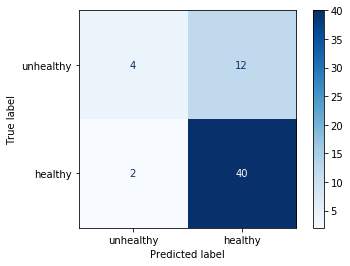

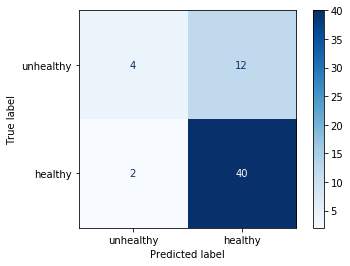

              precision    recall  f1-score   support

   unhealthy       0.67      0.25      0.36        16
     healthy       0.77      0.95      0.85        42

    accuracy                           0.76        58
   macro avg       0.72      0.60      0.61        58
weighted avg       0.74      0.76      0.72        58

              precision    recall  f1-score   support

   unhealthy       0.67      0.25      0.36        16
     healthy       0.77      0.95      0.85        42

    accuracy                           0.76        58
   macro avg       0.72      0.60      0.61        58
weighted avg       0.74      0.76      0.72        58



In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support




preds1 = dummy_default.predict(test)
preds2 = kNN_default.predict(test)


print("The average testing accuracy of the default dummy classifier is: ", accuracy_score(test_labels, preds1))
print("The average testing accuracy of the default kNN classifier is: ", accuracy_score(test_labels, preds2))


disp1 = plot_confusion_matrix(dummy_default, test, test_labels,
                                 display_labels=["unhealthy", "healthy"],
                                 cmap=plt.cm.Blues)
plt.show()

disp1 = plot_confusion_matrix(kNN_default, test, test_labels,
                                 display_labels=["unhealthy", "healthy"],
                                 cmap=plt.cm.Blues)
plt.show()

print(classification_report(test_labels, preds1, target_names=["unhealthy", "healthy"]))
print(classification_report(test_labels, preds2, target_names=["unhealthy", "healthy"]))